In [1]:
import csv
import dateutil.parser # for parsing plain-text dates
import gzip
import json
import math
import matplotlib.pyplot as plt
import numpy
import sklearn
from collections import defaultdict
from sklearn import linear_model

In [2]:
path = "ratebeer.json.gz"
def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)
        
data = list(parse(path))

In [3]:
import pandas as pd

In [9]:
import numpy as np

# EDA and Cleaning

In [57]:
df = pd.DataFrame()
for i in range(0, len(data[0:1000])):
    review = pd.DataFrame(data[i], index=[i])
    df = pd.concat([df, review], axis=0)
    

In [179]:
beers

,beer/name,beer/beerId,beer/brewerId,beer/ABV,beer/style,review/appearance,review/aroma,review/palate,review/taste,review/overall,review/time,review/profileName,review/text
0,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale &#40;IPA&#41;,4/5,6/10,3/5,6/10,13,1157587200,hopdog,"On tap at the Springfield, PA location. Poured..."
1,John Harvards Simcoe IPA,63836,8481,5.4,India Pale Ale &#40;IPA&#41;,4/5,6/10,4/5,7/10,13,1157241600,TomDecapolis,On tap at the John Harvards in Springfield PA....
2,John Harvards Cristal Pilsner,71716,8481,5.0,Bohemian Pilsener,4/5,5/10,3/5,6/10,14,958694400,PhillyBeer2112,"UPDATED: FEB 19, 2003 Springfield, PA. I've ne..."
3,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,2/5,4/10,2/5,4/10,8,1157587200,TomDecapolis,On tap the Springfield PA location billed as t...
4,John Harvards Fancy Lawnmower Beer,64125,8481,5.4,Klsch,2/5,4/10,2/5,4/10,8,1157587200,hopdog,"On tap at the Springfield, PA location. Poured..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Heartland Farmer Jons Oatmeal Stout,7717,6516,6.0,Sweet Stout,4/5,7/10,4/5,7/10,13,1122249600,Jonathan3584,Black pour with a good tan head. Aroma is hea...
199996,Heartland Farmer Jons Oatmeal Stout,7717,6516,6.0,Sweet Stout,4/5,6/10,3/5,6/10,13,1117843200,21iceman40,so i see this won an award or somethin. well i...
199997,Heartland Farmer Jons Oatmeal Stout,7717,6516,6.0,Sweet Stout,4/5,5/10,4/5,8/10,16,1117670400,Stew41,These guys ship out some pretty good beer and ...
199998,Heartland Farmer Jons Oatmeal Stout,7717,6516,6.0,Sweet Stout,5/5,9/10,5/5,10/10,18,1117324800,GirlyBeer,I had this at Hearland Brewery in NYC. Great ...


In [14]:
subsample = data[0:100]

In [4]:
beers = pd.DataFrame(data[0:200000])

In [5]:
beers['beer/beerId'].describe()

count     200000
unique      8202
top           53
freq        3056
Name: beer/beerId, dtype: object

In [6]:
beers['review/overall'] = beers['review/overall'].apply(lambda x: x[:-3])

In [21]:
beers['review/overall'] = beers['review/overall'].astype(int)

In [116]:
beers['review/overall'].describe()

count    200000.000000
mean         13.506125
std           2.941808
min           1.000000
25%          12.000000
50%          14.000000
75%          15.000000
max          20.000000
Name: review/overall, dtype: float64

In [175]:
brewery_grouped = beers[['beer/brewerId', 'review/overall']].groupby(['beer/brewerId']).agg('count')

In [173]:
brewery_grouped = brewery_grouped.sort_values(by='review/overall')

In [26]:
import seaborn as sns

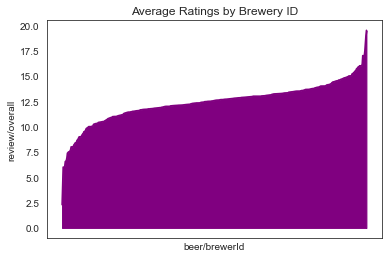

In [72]:
sns.set_style("white")
sns.color_palette("rocket")
g1 = sns.lineplot(x=brewery_grouped.index, y="review/overall", data = brewery_grouped, color='purple', sort=False)
g1.set_title('Average Ratings by Brewery ID')
g1.fill_between(brewery_grouped.index.values, brewery_grouped["review/overall"].values, color='purple')
g1.set(xticks=[])

plt.show()

In [88]:
brewery_grouped = brewery_grouped.sort_values(by='review/overall' ,ascending=False)[:10]

In [176]:
brewery_grouped['review/overall'].describe()

count      573.000000
mean       349.040140
std       1365.383359
min          1.000000
25%          9.000000
50%         35.000000
75%        156.000000
max      21613.000000
Name: review/overall, dtype: float64

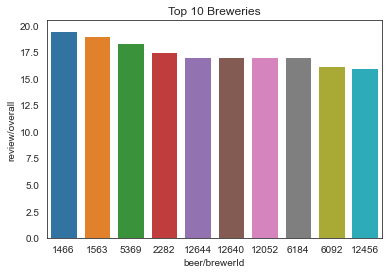

In [105]:
sns.set_style("white")
sns.color_palette("viridis")
g3 = sns.barplot(x=brewery_grouped.index, y="review/overall", data = brewery_grouped, order= brewery_grouped.index)
g3.set_title('Top 10 Breweries')
#g3.fill_between(brewery_grouped.index.values, brewery_grouped["review/overall"].values, color='purple')
#g2.set(xticks=[])
#g2.set_xlim(1, 18)

plt.show()

In [212]:
top10_brew = brewery_grouped.sort_values('review/overall', ascending=False)[:10]

top10_brew['review/overall'].sum()

88393

In [215]:
brewery_grouped.count()

review/overall    573
dtype: int64

In [110]:
gbeers = beers[['beer/name', 'beer/beerId', 'review/overall']].groupby(['beer/beerId'])

In [119]:
gbeers.agg('count')['review/overall'].mean()

24.384296513045598

In [134]:
beers.loc[beers["beer/ABV"] == '-', 'beer/ABV'] = 0

beers['beer/ABV'] = beers['beer/ABV'].astype(float)
gbeers = beers[['beer/name', 'beer/beerId', 'beer/ABV']].groupby(['beer/beerId'])

In [138]:
gbeers.agg('first')['beer/ABV'].describe()

count    8202.000000
mean        4.544439
std         3.036976
min         0.000000
25%         3.602500
50%         5.000000
75%         6.000000
max        25.400000
Name: beer/ABV, dtype: float64

In [163]:
beers_g = beers[['beer/beerId', 'review/overall', 'beer/ABV']].groupby(['beer/beerId']).agg('mean').sort_values('beer/ABV')

In [164]:
beers_g

,review/overall,beer/ABV
beer/beerId,,
120453,11.000000,0.0
72476,14.076923,0.0
72488,13.774194,0.0
72525,13.000000,0.0
72546,13.400000,0.0
...,...,...
40446,16.000000,20.0
78473,16.384615,21.0
129766,15.181818,22.0


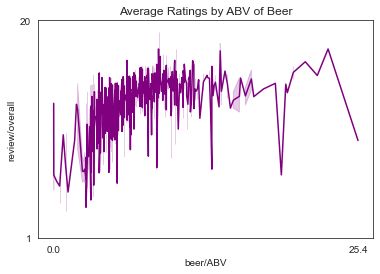

In [169]:
sns.set_style("white")
#sns.color_palette("rocket")
g4 = sns.lineplot(x='beer/ABV', y="review/overall", data = beers_g, color='purple', sort=False)
g4.set_title('Average Ratings by ABV of Beer')
#g4.fill_between(beers_g["beer/ABV"].values, beers_g["review/overall"].values, color='purple')
g4.set(xticks=[0, 25.4])
g4.set(yticks=[1.00, 20.00])


plt.show()

In [170]:
beers.corr()

,beer/ABV,review/overall
beer/ABV,1.000000,0.361157
review/overall,0.361157,1.000000


### Beer Analysis

In [180]:
beers_g = beers[['beer/beerId', 'review/overall']].groupby(['beer/beerId']).agg('count')

In [182]:
beers_g.describe()

,review/overall
count,8202.000000
mean,24.384297
std,101.356756
min,1.000000
25%,2.000000
50%,4.000000
75%,12.000000
max,3056.000000


In [191]:
beers_g2 = beers[['beer/beerId', 'review/overall', 'beer/name']].groupby(['beer/beerId']).agg('mean')
beers_g2

,review/overall
beer/beerId,
100001,12.250000
100020,15.250000
100032,6.142857
100047,14.485714
100079,15.000000
...,...
99911,12.307692
99952,15.000000
9999,9.957265


In [189]:
beers_g2 = beers_g2.sort_values(by='review/overall' ,ascending=False)[:10]

In [196]:
beers_g2
#pd.concat([beers_g2, beers[['beer/beerId', 'beer/name']]], axis=0)

,review/overall
beer/beerId,
100001,12.250000
100020,15.250000
100032,6.142857
100047,14.485714
100079,15.000000
...,...
99911,12.307692
99952,15.000000
9999,9.957265


In [217]:
#sns.set_style("white")
#sns.color_palette("viridis")
#g5 = sns.barplot(x=beers_g2.index, y="review/overall", data = beers_g2, order= beers_g2.index)
#g5.set_title('Top 10 Beers')

#plt.show()

### Review Analysis

In [219]:
beers['review/appearance'] = beers['review/appearance'].apply(lambda x: x[:-2]).astype(float)
beers['review/aroma'] = beers['review/aroma'].apply(lambda x: x[:-3]).astype(float)
beers['review/palate'] = beers['review/palate'].apply(lambda x: x[:-2]).astype(float)
beers['review/overall'] = beers['review/overall'].astype(float)


In [221]:
beers['review/taste'] = beers['review/taste'].apply(lambda x: x[:-3]).astype(float)

In [223]:
review_corr = beers[['review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'review/overall']]

In [225]:
review_corr.corr()

,review/appearance,review/aroma,review/palate,review/taste,review/overall
review/appearance,1.000000,0.460738,0.512506,0.477615,0.499224
review/aroma,0.460738,1.000000,0.529642,0.746162,0.739241
review/palate,0.512506,0.529642,1.000000,0.644613,0.654019
review/taste,0.477615,0.746162,0.644613,1.000000,0.848397
review/overall,0.499224,0.739241,0.654019,0.848397,1.000000


In [229]:
review_corr = review_corr.rename(columns = {'review/appearance':'appearance',
                                            'review/aroma': 'aroma',
                                            'review/palate': 'palate',
                                            'review/taste': 'taste',
                                            'review/overall': 'overall'}
                                )

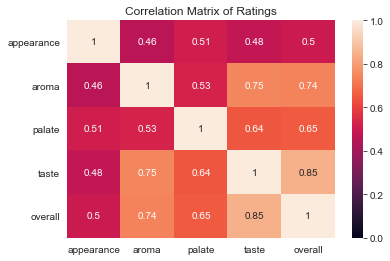

In [232]:
corr_plot = sns.heatmap(review_corr.corr(), vmin=0, vmax=1, annot=True)

corr_plot.set_title('Correlation Matrix of Ratings')
plt.show()